In [88]:
%matplotlib inline
import math
import numpy as np
import numpy.random as nrand
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import scipy.stats as stats
import powerlaw
from pandas_datareader import data
from pylab import plot, show
from math import isclose
import itertools
import statsmodels.tsa.stattools as ts
import quandl
from functions.helpers import hurst

# Calibration

In the calculation of the price to dividends ratio, I follow Adam et al. (2016). Perhaps dividends need to be seasonally adjusted?

In [80]:
start_date = '1980-01-01'
end_date = '2017-12-31'

In [81]:
spy_real_price = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH", authtoken="8EKNms1cLLU-dBjk5Y4d").loc[start_date:end_date]
spy_real_price = spy_real_price.rename(columns={"Value": "price"})
spy_dividends = quandl.get("MULTPL/SP500_DIV_MONTH", authtoken="8EKNms1cLLU-dBjk5Y4d").loc[start_date:end_date]
spy_dividends = spy_dividends.rename(columns={"Value": "dividends"})

In [82]:
spy_dividends['new_index'] = range(1, len(spy_dividends)+1)
spy_dividends= spy_dividends.set_index('new_index')
spy_real_price['new_index'] = range(0, len(spy_dividends))
spy_real_price= spy_real_price.set_index('new_index')

In [83]:
#cpi

In [84]:
spy_all = pd.concat([spy_dividends, spy_real_price], axis=1)
spy_all['pd'] = spy_all['price'] / spy_all['dividends']
spy_all['spy_dev_fund'] = (spy_all['price'] - spy_all['dividends']) / spy_all['dividends']

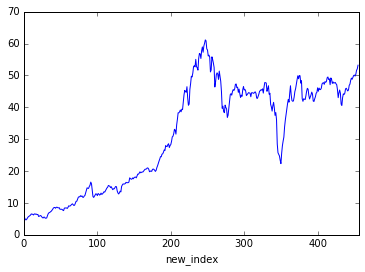

In [86]:
spy_all['spy_dev_fund'].plot()

## Test for mean reversion

In [89]:
ts.adfuller(spy_all['spy_dev_fund'].iloc[1:-1], 1)

(-1.1874800647406767,
 0.67895815112343672,
 1,
 453,
 {'1%': -3.4448681948588309,
  '10%': -2.5701797149735146,
  '5%': -2.867941416548597},
 1480.8513742090613)

## Stationarity
Then, I do a Hurst component analysis to find that the deviation from fundamentals follows something close to a geometric brownian motion. 

In [90]:
hurst(spy_all['spy_dev_fund'].iloc[1:-1])

0.48289791593588238

## Autocorrelation structure

In [69]:
ac_pd = [spy_all['pd'].autocorr(lag=lag) for lag in range(100)]

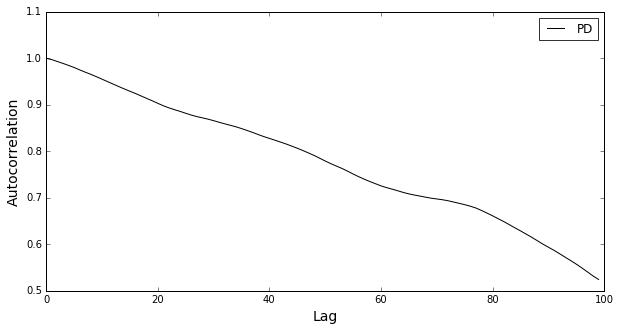

In [70]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(ac_pd)), ac_pd, 'k-', label='PD')

ax1.legend(frameon=True, loc='best', framealpha=0.8)
ax1.set_ylabel('Autocorrelation', fontsize='14')
ax1.set_xlabel('Lag', fontsize='14')

In [72]:
ac_pd[1]

0.99714624961690246